In [1]:
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
winners = pd.read_csv('three_data/winners.csv')    
losers = pd.read_csv('three_data/losers.csv')

we know the winner of the game is likely the team which has a higher 3point percentage, does this relationship also hold for 2 point shots , (we count anyhting not a three pointer a 2 point field goal). Is their a deeper realtion here, if the team is shooting at higher percentage three then they are likely to also get more 2 points shots made 

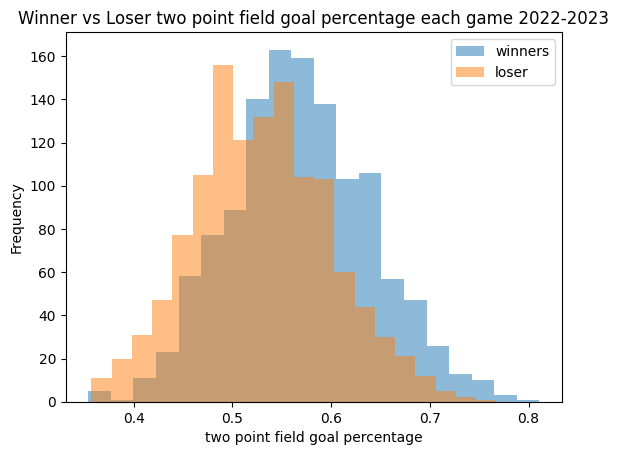

In [3]:
winners['FG2']=winners['FG']-winners['FG3']
losers['FG2']=losers['FG']-losers['FG3']
winners['FG2A']=winners['FGA']-winners['FG3A']
losers['FG2A']=losers['FGA']-losers['FG3A']
winners['FG2PCT']=winners['FG2']/winners['FG2A']
losers['FG2PCT']=losers['FG2']/losers['FG2A']


plt.hist(winners['FG2PCT'], bins=20, alpha=0.5, label='winners')
plt.hist(losers['FG2PCT'], bins=20, alpha=0.5, label='loser')
plt.title('Winner vs Loser two point field goal percentage each game 2022-2023')
plt.xlabel('two point field goal percentage')
plt.ylabel('Frequency')
plt.title('Winner vs Loser two point field goal percentage each game 2022-2023')
plt.legend()

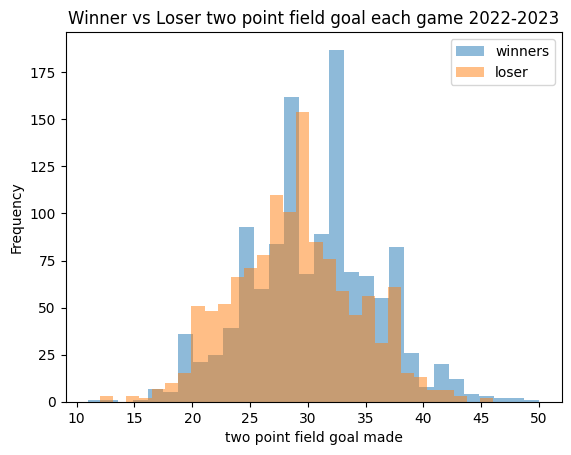

In [4]:
plt.hist(winners['FG2'], bins=30, alpha=0.5, label='winners')
plt.hist(losers['FG2'], bins=30, alpha=0.5, label='loser')
plt.title('Winner vs Loser two point field goal')
plt.xlabel('two point field goal made')
plt.ylabel('Frequency')
plt.title('Winner vs Loser two point field goal each game 2022-2023')
plt.legend()

In [5]:
print(stats.mannwhitneyu(winners['FG2PCT'], losers['FG2PCT'], alternative='two-sided'),"2 point field goal percentage")
print(stats.mannwhitneyu(winners['FG2'], losers['FG2'], alternative='two-sided'),"2 point field goal made")

MannwhitneyuResult(statistic=987462.0, pvalue=2.6894228041458044e-39) 2 point field goal percentage
MannwhitneyuResult(statistic=884569.0, pvalue=3.221264249627682e-13) 2 point field goal made


Is their a correleation with 2 point shot and three point shot 

-0.5448768629824203


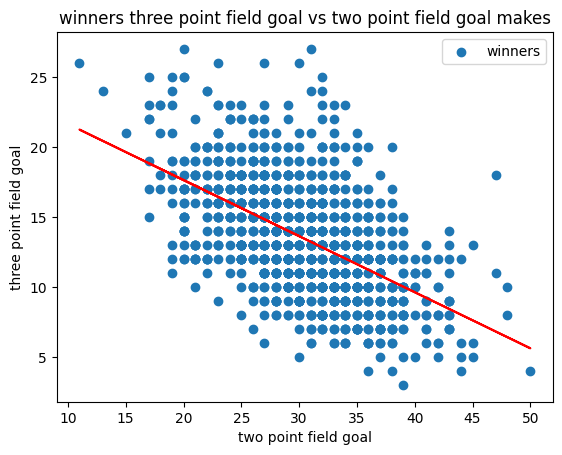

In [6]:

reg_winner=stats.linregress(winners['FG2'], winners['FG3'])

plt.scatter(winners['FG2'], winners['FG3'], label='winners')
plt.plot(winners['FG2'], reg_winner.intercept+reg_winner.slope*winners['FG2'], color='red')

plt.xlabel('two point field goal')
plt.ylabel('three point field goal')
plt.title('winners three point field goal vs two point field goal makes')
plt.legend()

print(reg_winner.rvalue)

-0.6092580192930822


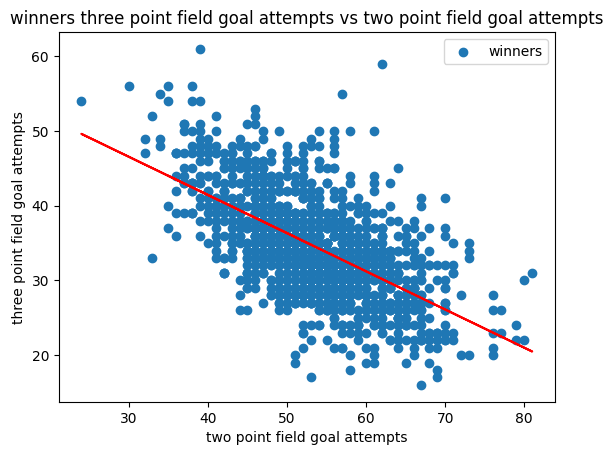

In [7]:
reg_winnner_attempts=stats.linregress(winners['FG2A'], winners['FG3A'])
plt.scatter(winners['FG2A'], winners['FG3A'], label='winners')
plt.plot(winners['FG2A'], reg_winnner_attempts.intercept+reg_winnner_attempts.slope*winners['FG2A'], color='red')
plt.xlabel('two point field goal attempts')
plt.ylabel('three point field goal attempts')
plt.title('winners three point field goal attempts vs two point field goal attempts')

plt.legend()

print(reg_winnner_attempts.rvalue)

-0.5127821579278091


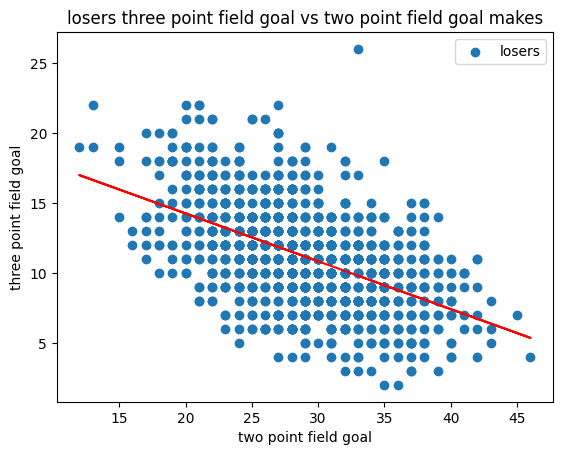

In [8]:
reg_loser=stats.linregress(losers['FG2'], losers['FG3'])
plt.scatter(losers['FG2'], losers['FG3'], label='losers')
plt.plot(losers['FG2'], reg_loser.intercept+reg_loser.slope*losers['FG2'], color='red')

plt.xlabel('two point field goal')
plt.ylabel('three point field goal')
plt.title('losers three point field goal vs two point field goal makes')
plt.legend()
print(reg_loser.rvalue)


-0.5494549200362506


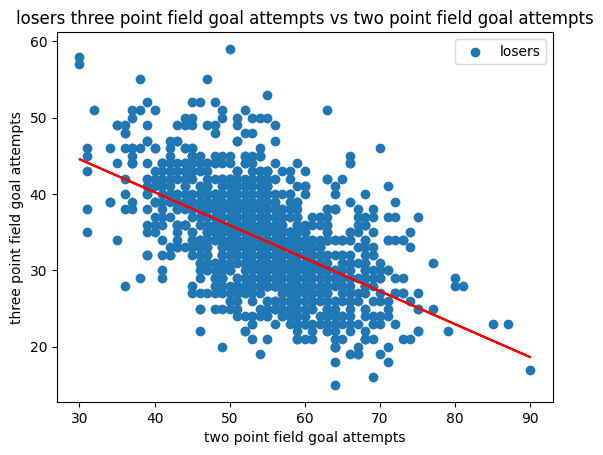

In [9]:
reg_loser_attempts=stats.linregress(losers['FG2A'], losers['FG3A'])
plt.scatter(losers['FG2A'], losers['FG3A'], label='losers')
plt.plot(losers['FG2A'], reg_loser_attempts.intercept+reg_loser_attempts.slope*losers['FG2A'], color='red')
plt.xlabel('two point field goal attempts')
plt.ylabel('three point field goal attempts')
plt.title('losers three point field goal attempts vs two point field goal attempts')
plt.legend()
print(reg_loser_attempts.rvalue)

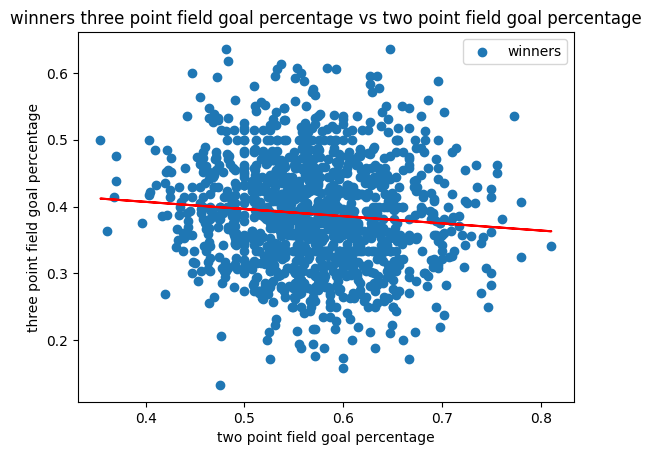

In [10]:
reg_winnert_percent=stats.linregress(winners['FG2PCT'], winners['FG3_PCT'])

plt.scatter(winners['FG2PCT'], winners['FG3_PCT'], label='winners')
plt.plot(winners['FG2PCT'], reg_winnert_percent.intercept+reg_winnert_percent.slope*winners['FG2PCT'], color='red')
plt.xlabel('two point field goal percentage')
plt.ylabel('three point field goal percentage')
plt.title('winners three point field goal percentage vs two point field goal percentage')
plt.legend()


#format the print value wiht label
out = 'r value ={:.3f}.'.format(reg_winnert_percent.rvalue)
plt.show()


-0.10610306863127965


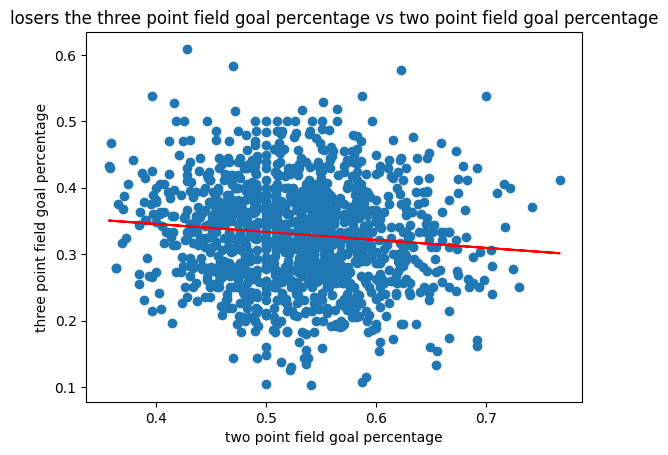

In [11]:
reg_loser_percent=stats.linregress(losers['FG2PCT'], losers['FG3_PCT'])

plt.scatter(losers['FG2PCT'], losers['FG3_PCT'], label='losers')
plt.plot(losers['FG2PCT'], reg_loser_percent.intercept+reg_loser_percent.slope*losers['FG2PCT'], color='red')
plt.xlabel('two point field goal percentage')
plt.ylabel('three point field goal percentage')
plt.title('losers the three point field goal percentage vs two point field goal percentage')
print(reg_loser_percent.rvalue)

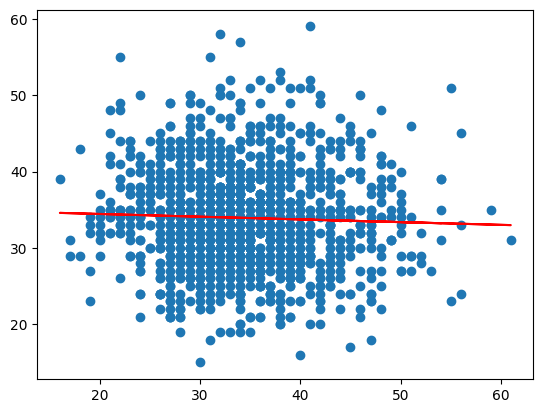

In [12]:
winner_vs_loser=stats.linregress(winners['FG3A'], losers['FG3A'])
plt.scatter(winners['FG3A'], losers['FG3A'], label='winners vs losers')
plt.plot(winners['FG3A'], winner_vs_loser.intercept+winner_vs_loser.slope*winners['FG3A'], color='red')

we have winners and loser two catogories and we also have , two different ways of scoring the basket 

wheater you shoot the three or two it dosnt matter the differnece bettwen the winner and loser will be the same



8.295843060256776e-21
      winner loser
two   FG2   FG2
three  FG3   FG3



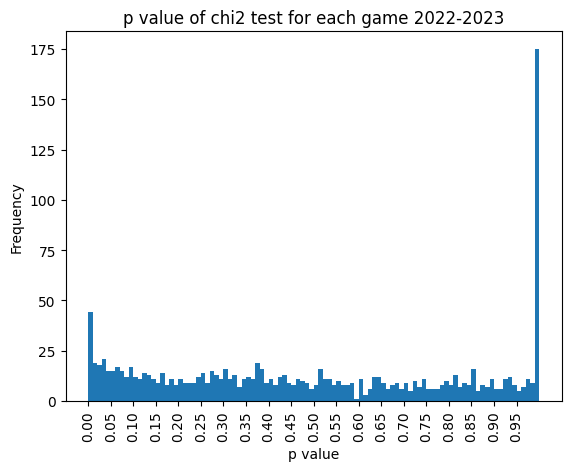

      winner loser
two   FG2   FG2
three  FG3   FG3



In [13]:
import numpy as np
contigency=[[winners['FG2'].sum(), losers['FG2'].sum()], 
            [winners['FG3'].sum(), losers['FG3'].sum()]]

chi2, p, dof, expected = stats.chi2_contingency(contigency)
print(p)

#apply stats contentingency to all winners and losers
p_value_series=np.zeros(len(winners))

#iterate over every row in winners and losers
for i in range(len(winners)):
    contigency=[[winners.iloc[i]['FG2'], losers.iloc[i]['FG2']], 
            [winners.iloc[i]['FG3'], losers.iloc[i]['FG3']]]
    chi2, p, dof, expected = stats.chi2_contingency(contigency)
    p_value_series[i]=p

#plot histogram of p values
plt.hist(p_value_series, bins=100)
plt.xlabel('p value')
plt.xticks(np.arange(0, 1, step=0.05),rotation=90)
plt.ylabel('Frequency')
plt.title('p value of chi2 test for each game 2022-2023')

ptest_format="      winner loser\ntwo   FG2   FG2\nthree  FG3   FG3\n"
print(ptest_format) 

plt.show()
print(ptest_format)
plt.show()


|      | winner | loser |
| -----|--------|-------|
| two  |        |       |
| three|        |       |
